In [248]:
import pandas as pd 
import numpy as num 
import matplotlib.pyplot as mat
import seaborn as sea 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [249]:
df = pd.read_csv('C:/Users/mohieldine/Desktop/Python Tutorial/Indian Used Cars/usedCars.csv')
df.head(100)

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,555675,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,NaN,2018-02-01,2018,NaN,5.75 Lakhs,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,556383,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,Manual,2021-03-01,2021,NaN,4.35 Lakhs,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,556422,HYUNDAI,GRAND I10,1.2 KAPPA ASTA,PETROL,Grey,37889,HATCHBACK,Manual,2015-03-01,2015,NaN,4.7 Lakhs,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,556771,TATA,NEXON,XT PLUS,PETROL,A Blue,13106,HATCHBACK,NaN,2020-08-01,2020,NaN,9.9 Lakhs,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,559619,FORD,FIGO,EXI DURATORQ 1.4,DIESEL,Silver,104614,HATCHBACK,Manual,2010-11-01,2010,NaN,2.7 Lakhs,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,585018,VOLKSWAGEN,POLO,GT TSI 1.2 PETROL AT,PETROL,White,63088,HATCHBACK,AUOTMATIC,2017-07-01,2017,NaN,9 Lakhs,2nd Owner,Karnataka,Cardiction,Bangalore,1,7.6
96,585031,HYUNDAI,ELITE I20,SPORTZ 1.2,PETROL,Red,45607,HATCHBACK,manual,2016-06-01,2016,NaN,6.95 Lakhs,1st Owner,Karnataka,Cardiction,Bangalore,1,8.0
97,585039,FORD,ECOSPORT(2017-2019),TREND 1.5L TDCI,DIESEL,Brown,63212,SUV,NaN,2018-10-01,2018,NaN,9.85 Lakhs,1st Owner,Karnataka,Cardiction,Bangalore,1,7.9
98,585066,NISSAN,KICKS,XV 1.5,PETROL,White,40924,SUV,NaN,2019-01-01,2019,NaN,7.95 Lakhs,1st Owner,Karnataka,ACE MOTORS,Bangalore,1,8.2


In [250]:
df.drop(columns=['Id'], inplace=True)

In [251]:
df.drop(columns=['Variant'], inplace=True)

In [252]:
df['FuelType'] = df['FuelType'].replace({'manual': 'Manual'})

In [253]:
df.shape

(1064, 17)

In [254]:
df.columns

Index(['Company', 'Model', 'FuelType', 'Colour', 'Kilometer', 'BodyStyle',
       'TransmissionType', 'ManufactureDate', 'ModelYear', 'CngKit', 'Price',
       'Owner', 'DealerState', 'DealerName', 'City', 'Warranty',
       'QualityScore'],
      dtype='object')

In [255]:
df.duplicated().sum()

0

In [256]:
df.isnull().sum()

Company                0
Model                  0
FuelType               1
Colour                 0
Kilometer              0
BodyStyle              0
TransmissionType     714
ManufactureDate        0
ModelYear              0
CngKit              1042
Price                  0
Owner                  0
DealerState            0
DealerName             0
City                   0
Warranty               0
QualityScore           0
dtype: int64

In [257]:
df.drop(columns='TransmissionType',inplace = True)
df.drop(columns='CngKit',inplace = True)

In [258]:
df.shape

(1064, 15)

In [259]:
df.head(20)

,Company,Model,FuelType,Colour,Kilometer,BodyStyle,ManufactureDate,ModelYear,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,MARUTI SUZUKI,CELERIO(2017-2019),PETROL,Silver,33197,HATCHBACK,2018-02-01,2018,5.75 Lakhs,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,MARUTI SUZUKI,ALTO,PETROL,Red,10322,HATCHBACK,2021-03-01,2021,4.35 Lakhs,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,HYUNDAI,GRAND I10,PETROL,Grey,37889,HATCHBACK,2015-03-01,2015,4.7 Lakhs,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,TATA,NEXON,PETROL,A Blue,13106,HATCHBACK,2020-08-01,2020,9.9 Lakhs,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,FORD,FIGO,DIESEL,Silver,104614,HATCHBACK,2010-11-01,2010,2.7 Lakhs,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5
5,MERCEDES BENZ,E CLASS,DIESEL,Black,87700,SEDAN,2013-04-01,2013,9.99 Lakhs,3rd Owner,Karnataka,Zippy Automart,Bangalore,0,7.2
6,VOLKSWAGEN,AMEO,DIESEL,Blue,70577,SEDAN,2017-06-01,2017,6.75 Lakhs,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
7,MARUTI SUZUKI,ERTIGA,PETROL,A Blue,76259,MPV,2013-07-01,2013,6 Lakhs,1st Owner,Karnataka,NK Cars,Bangalore,1,7.6
8,MARUTI SUZUKI,SWIFT,PETROL,Silver,85000,HATCHBACK,2015-02-01,2015,4.8 Lakhs,3rd Owner,Karnataka,NK Cars,Bangalore,0,7.4
9,HYUNDAI,I10,PETROL,Red,77000,HATCHBACK,2008-05-01,2008,2.4 Lakhs,2nd Owner,Karnataka,NK Cars,Bangalore,0,7.2


In [260]:
df.nunique()

Company              23
Model               218
FuelType              5
Colour               76
Kilometer          1006
BodyStyle            10
ManufactureDate     162
ModelYear            17
Price               367
Owner                 4
DealerState          10
DealerName           57
City                 11
Warranty              2
QualityScore         43
dtype: int64

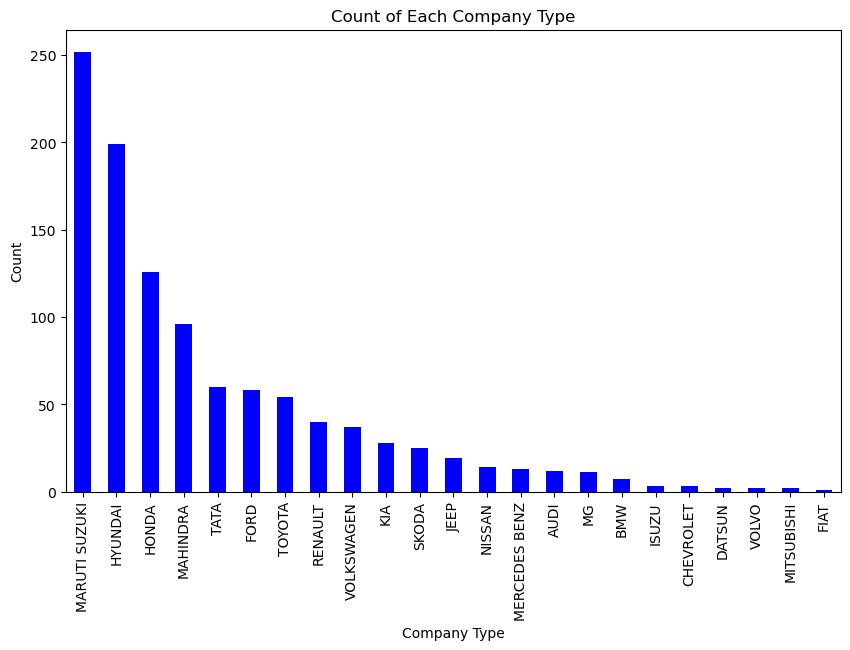

In [261]:
company_counts = df['Company'].value_counts()

# Create a bar chart
mat.figure(figsize=(10, 6))
company_counts.plot(kind='bar', color='blue')
mat.title("Count of Each Company Type")
mat.xlabel("Company Type")
mat.ylabel("Count")
mat.show()

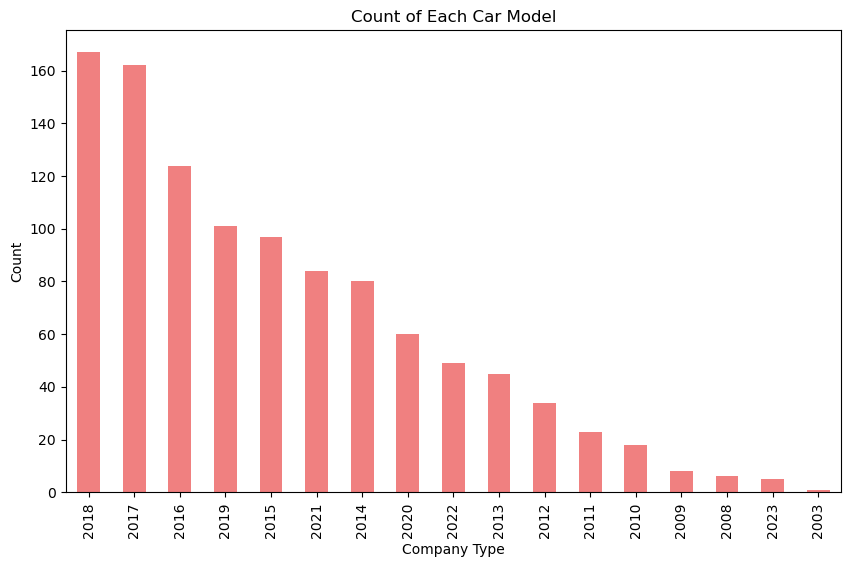

In [262]:
company_counts = df['ModelYear'].value_counts()

# Create a bar chart
mat.figure(figsize=(10, 6))
company_counts.plot(kind='bar', color='lightcoral')
mat.title("Count of Each Car Model")
mat.xlabel("Company Type")
mat.ylabel("Count")
mat.show()

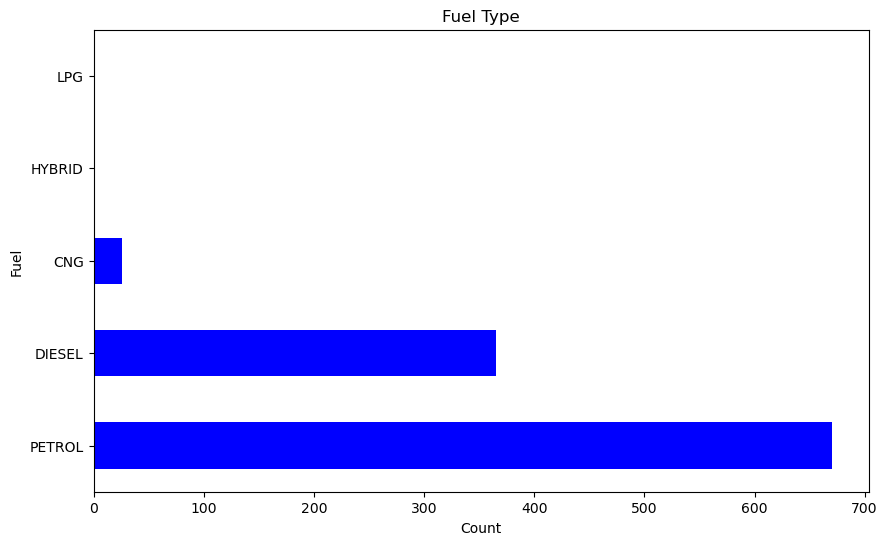

In [263]:
company_counts = df['FuelType'].value_counts()

# Create a bar chart
mat.figure(figsize=(10, 6))
company_counts.plot(kind='barh', color='blue')
mat.title("Fuel Type")
mat.xlabel("Count")
mat.ylabel("Fuel")
mat.show()

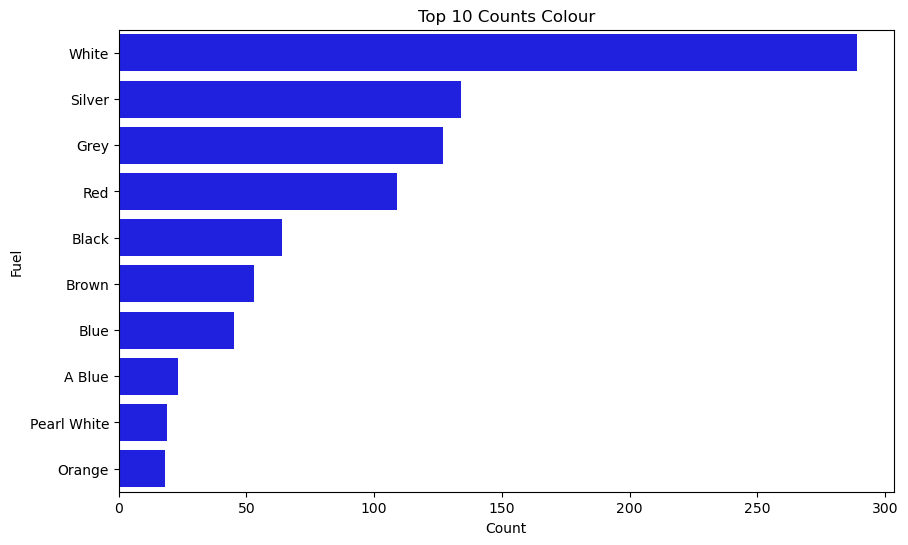

In [264]:
# Create a figure
fig, ax = mat.subplots(figsize=(10, 6))

# Get the top 10 counts and their corresponding colors
top_10_counts = df['Colour'].value_counts().head(10)

# Create a horizontal bar chart for the top 10 counts
sea.barplot(x=top_10_counts, y=top_10_counts.index, color='blue', ax=ax)

# Set labels and title for the plot
ax.set_xlabel("Count")
ax.set_ylabel("Fuel")
ax.set_title("Top 10 Counts Colour")

# Show the plot
mat.show()


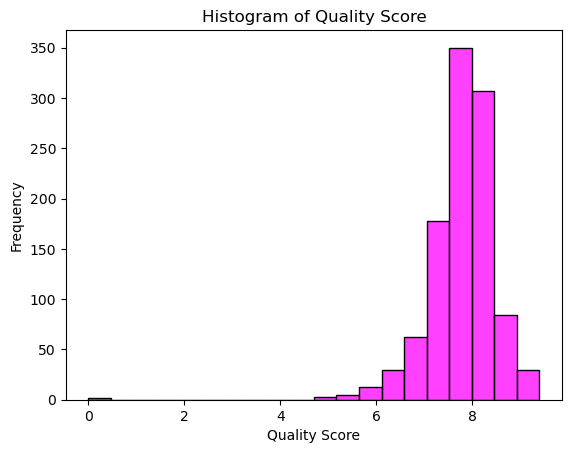

In [265]:
sea.histplot(data=df, x='QualityScore', bins=20, color='magenta')

# Set labels and title
mat.xlabel('Quality Score')
mat.ylabel('Frequency')
mat.title('Histogram of Quality Score')

# Show the plot
mat.show()

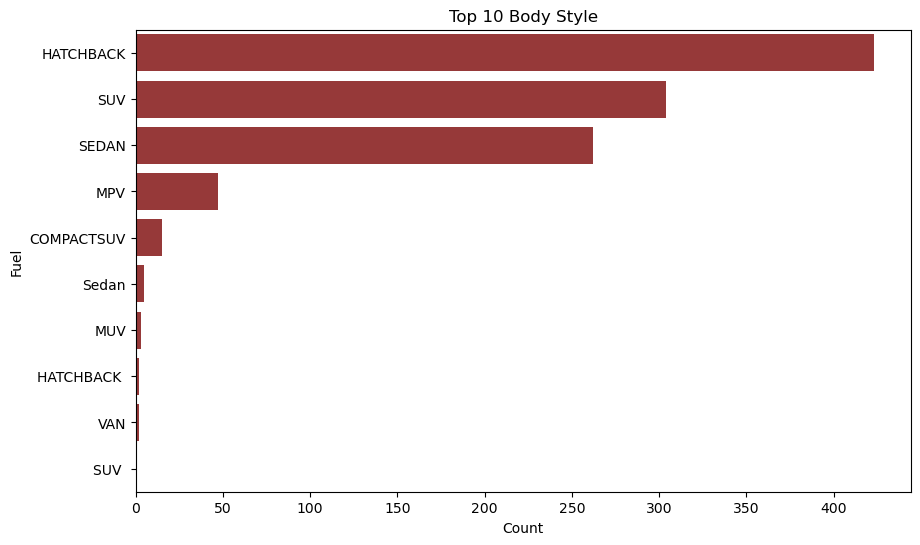

In [266]:
# Create a figure
fig, ax = mat.subplots(figsize=(10, 6))

# Get the top 10 counts and their corresponding colors
top_10_counts = df['BodyStyle'].value_counts().head(10)

# Create a horizontal bar chart for the top 10 counts
sea.barplot(x=top_10_counts, y=top_10_counts.index, color='brown', ax=ax)

# Set labels and title for the plot
ax.set_xlabel("Count")
ax.set_ylabel("Fuel")
ax.set_title("Top 10 Body Style")

# Show the plot
mat.show()


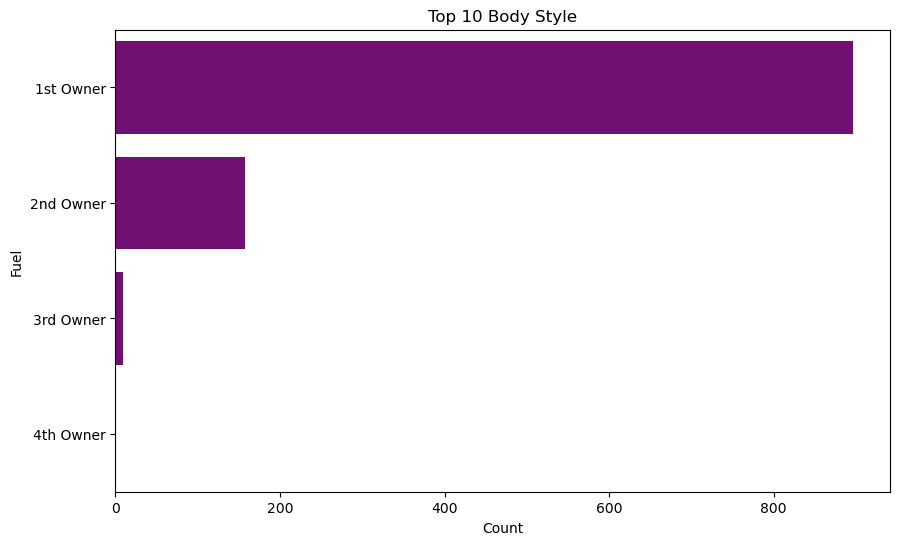

In [267]:
# Create a figure
fig, ax = mat.subplots(figsize=(10, 6))

# Get the top 10 counts and their corresponding colors
top_10_counts = df['Owner'].value_counts()

# Create a horizontal bar chart for the top 10 counts
sea.barplot(x=top_10_counts, y=top_10_counts.index, color='purple', ax=ax)

# Set labels and title for the plot
ax.set_xlabel("Count")
ax.set_ylabel("Fuel")
ax.set_title("Top 10 Body Style")

# Show the plot
mat.show()


In [268]:
df.dtypes

Company             object
Model               object
FuelType            object
Colour              object
Kilometer            int64
BodyStyle           object
ManufactureDate     object
ModelYear            int64
Price               object
Owner               object
DealerState         object
DealerName          object
City                object
Warranty             int64
QualityScore       float64
dtype: object

In [269]:
#LabelEncoder to convert all the non-numeric values to numeric 
cols = df.columns[df.dtypes == 'object']

#Label encoder object
le = LabelEncoder()

#Label encoding the columns
for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])

In [270]:
df.dtypes

Company              int32
Model                int32
FuelType             int32
Colour               int32
Kilometer            int64
BodyStyle            int32
ManufactureDate      int32
ModelYear            int64
Price                int32
Owner                int32
DealerState          int32
DealerName           int32
City                 int32
Warranty             int64
QualityScore       float64
dtype: object

In [271]:
#removing the outliers
z_score_threshold = 3

z_scores = num.abs((df[['FuelType', 'ManufactureDate', 'Warranty','Company']] - df[['FuelType', 'ManufactureDate', 'Warranty','Company']].mean()) / df[['FuelType', 'ManufactureDate', 'Warranty','Company']].std())

df_no_outliers = df[(z_scores <= z_score_threshold).all(axis=1)]



In [272]:
#Min_Max Scaler
Min_Max = MinMaxScaler()

df['FuelType'] = Min_Max.fit_transform(df['FuelType'].values.reshape(-1,1))
df['ManufactureDate']= Min_Max.fit_transform(df['ManufactureDate'].values.reshape(-1,1))
df['Warranty']= Min_Max.fit_transform(df['Warranty'].values.reshape(-1,1))
df['Company']= Min_Max.fit_transform(df['Company'].values.reshape(-1,1))

<Axes: >

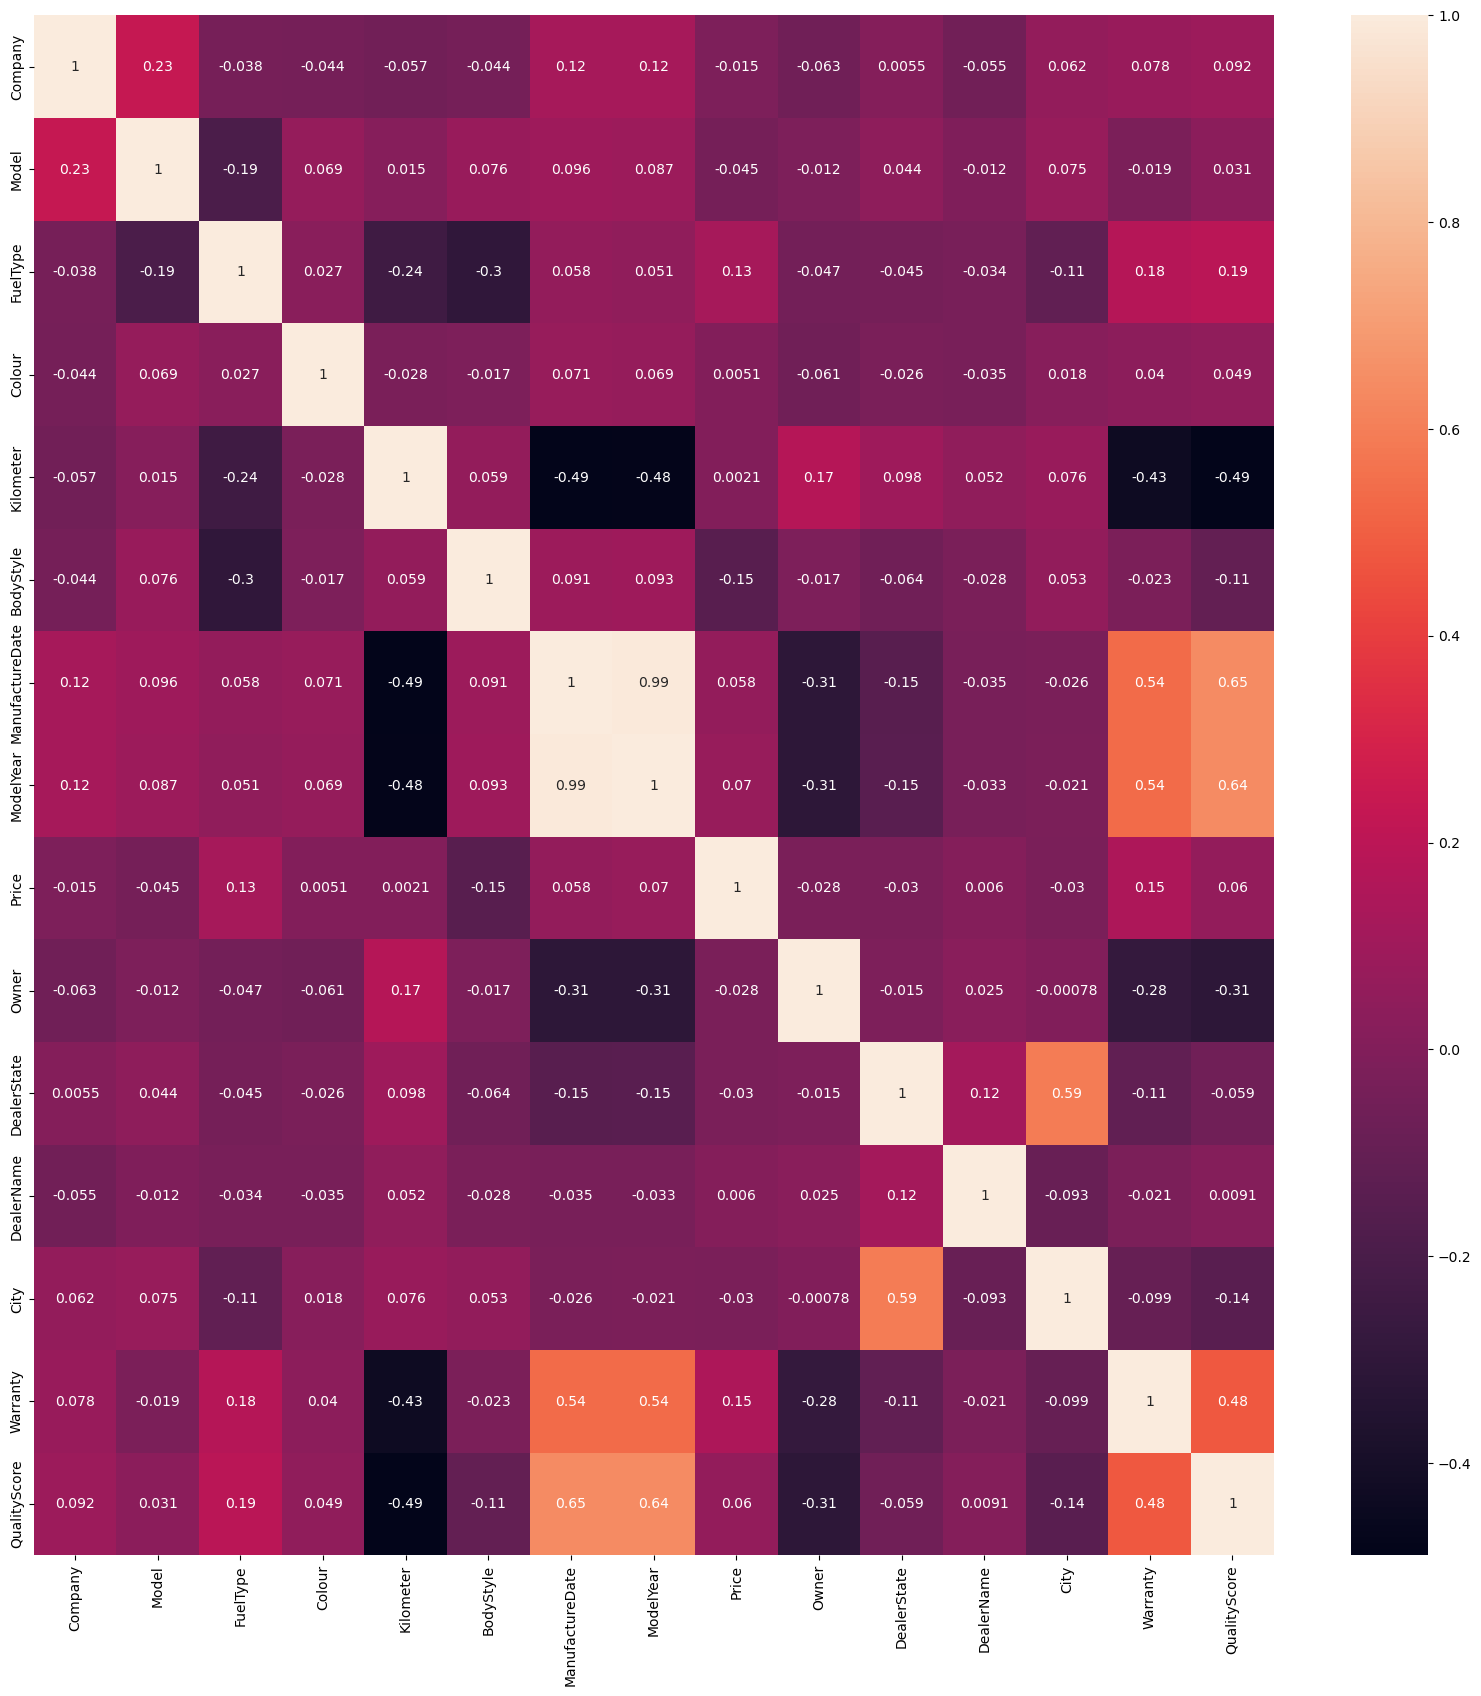

In [273]:
mat.figure(figsize=(20,20))
sea.heatmap(df.corr(), annot=True)

In [274]:
#define the training and learning model
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Price'), df['Price'], test_size=0.2, random_state=42)

In [275]:
from sklearn.model_selection import GridSearchCV

#Random_forest_clasifier
rfc = RandomForestClassifier()
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#Grid Search Object with Random Forest Classifier
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy')

#Fitting the data
grid_search.fit(X_train, y_train)

#Best parameters
print(grid_search.best_params_)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


C:\Users\mohieldine\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 42}


In [276]:
#Random Forest Classifier accuracy
rfc = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10, min_samples_split=2, random_state=42)

#Fitting the data
rfc.fit(X_train, y_train)

#Training accuracy
print('Training Accuracy: ', rfc.score(X_train, y_train))

#Predicting the values
r_pred = rfc.predict(X_test)

Training Accuracy:  0.7215041128084606


In [277]:
from sklearn.model_selection import GridSearchCV

#Decision_Tree_Classifier
dtree  = DecisionTreeClassifier()
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#Grid Search Object with Decision Tree Classifier
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy')

#Fitting the data
grid_search.fit(X_train, y_train)

#Best parameters
print(grid_search.best_params_)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


C:\Users\mohieldine\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


In [278]:
#Decision Tree Classifier accuracy
dtree  = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=2, min_samples_split=10, random_state=42)

#Fitting the data
dtree.fit(X_train, y_train)

#Training accuracy
print('Training Accuracy: ', dtree.score(X_train, y_train))

#Predicting the values
d_pred = dtree.predict(X_test)

Training Accuracy:  0.14336075205640422


In [279]:
from sklearn.model_selection import GridSearchCV

#K Nearst Classifier
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [2,4,6,8,10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

#Grid Search Object with KNN Classifier
grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy')

#Fitting the data
grid_search.fit(X_train, y_train)

#Best parameters
print(grid_search.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


C:\Users\mohieldine\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


{'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'uniform'}


In [280]:
#KNN Classifier Acurracy 
knn = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=6, weights='uniform')

#Fitting the data
knn.fit(X_train, y_train)

#Training accuracy
print('Training Accuracy: ', knn.score(X_train, y_train))

#Predicting the values
k_pred = knn.predict(X_test)

Training Accuracy:  0.18801410105757932


Text(0.5, 1.0, 'Random Forest Classifier Feature Importance')

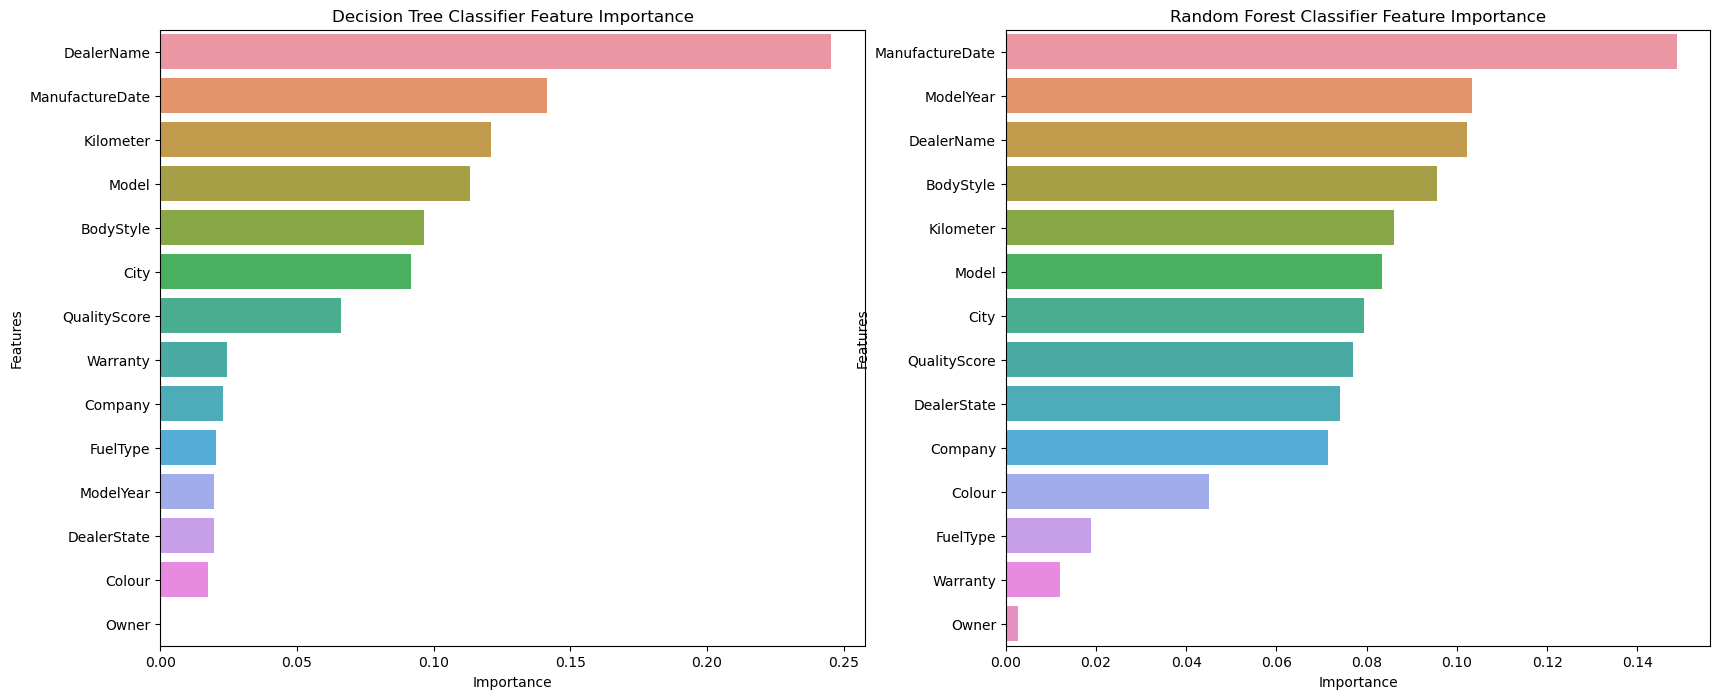

In [281]:
fig, ax = mat.subplots(1, 2, figsize=(20, 8))
# Decision Tree Classifier Feature Importance
feature_df = pd.DataFrame({'Features': X_train.columns, 'Importance': dtree.feature_importances_})
feature_df.sort_values('Importance', ascending=False, inplace=True)
sea.barplot(x = 'Importance', y = 'Features', data = feature_df, ax=ax[0]).set_title('Decision Tree Classifier Feature Importance')

# Random Forest Classifier Feature Importance
feature_df = pd.DataFrame({'Features': X_train.columns, 'Importance': rfc.feature_importances_})
feature_df.sort_values('Importance', ascending=False, inplace=True)
sea.barplot(x = 'Importance', y = 'Features', data = feature_df, ax=ax[1]).set_title('Random Forest Classifier Feature Importance')
